In [757]:
#Importing imp libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [758]:
#Reading dataset
#df = pd.read_csv(r'D:\VS code files\building_energy_consumption\dataset\singapore_dataset\end_end\data\building-energy-performance-data-for-2022.csv')
df = pd.read_csv(r'D:\VS code files\building_energy_consumption\dataset\singapore_dataset\end_end\data\synthetic_data.csv')
df.head()

,Building Type,Main Function,Building Size,EUI2022,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type,Age of Chiller,Aircon system efficiency (kW/RT)
0,"Civic, Community & Cultural Institution",Office,Small,484,2002,Not Given,Not Given,16122.0,5600.0,Others,0.0,0.0
1,Commercial Building,Office,Large,0,1993,Certified,New Building for Non-Residential buildings (ve...,13627.0,0.0,Not Given,5.0,0.0
2,Commercial Building,Retail,Medium,267,2016,Not Given,Not Given,23225.0,7110.0,Others,0.0,0.0
3,Healthcare Facility,Office,Not Given,235,1993,GoldPlus,Existing Non-Residential Buildings (RECERT 2017),47107.0,389.0,Others,0.0,0.0
4,Commercial Building,Retail,Large,0,1985,Platinum,New Building for Non-Residential buildings (ve...,7450.0,0.0,Not Given,1.0,0.0


In [759]:
#df.drop(columns=['AC Area Percentage'],inplace=True,axis=1)

In [760]:
#Data Shape
print("**"*30)
print(f"Shape of the data are as follow {df.shape[0]} rows & {df.shape[1]} Columns")
print("**"*30)

************************************************************
Shape of the data are as follow 1000 rows & 12 Columns
************************************************************


In [761]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EUI2022,1000.0,103.789,118.223683,0.0,0.00,76.5,174.50,484.0
TOP/CSC Year,1000.0,2001.492,14.036843,1960.0,1992.00,2005.0,2013.25,2024.0
GFA,1000.0,32686.029,61006.558347,0.0,8582.75,14672.0,32413.25,813841.0
AC Area,1000.0,12384.063,39947.526655,0.0,0.00,2053.0,10000.00,559390.0
Age of Chiller,1000.0,3.497,5.377795,0.0,0.00,0.0,6.00,22.0
Aircon system efficiency (kW/RT),1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


In [762]:
df.describe(include='object')

,Building Type,Main Function,Building Size,Award (Green/Non-Green),Green Mark Version,AC Type
count,1000,1000,1000,1000,1000,1000
unique,5,16,5,7,17,6
top,Commercial Building,Office,Not Given,Not Given,Not Given,Others
freq,678,357,400,499,468,334


In [763]:
df.isnull().sum()

Building Type                       0
Main Function                       0
Building Size                       0
EUI2022                             0
TOP/CSC Year                        0
Award (Green/Non-Green)             0
Green Mark Version                  0
GFA                                 0
AC Area                             0
AC Type                             0
Age  of Chiller                     0
Aircon system efficiency (kW/RT)    0
dtype: int64

In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Building Type                     1000 non-null   object 
 1   Main Function                     1000 non-null   object 
 2   Building Size                     1000 non-null   object 
 3   EUI2022                           1000 non-null   int64  
 4   TOP/CSC Year                      1000 non-null   int64  
 5   Award (Green/Non-Green)           1000 non-null   object 
 6   Green Mark Version                1000 non-null   object 
 7   GFA                               1000 non-null   float64
 8   AC Area                           1000 non-null   float64
 9   AC Type                           1000 non-null   object 
 10  Age  of Chiller                   1000 non-null   float64
 11  Aircon system efficiency (kW/RT)  1000 non-null   float64
dtypes: floa

In [765]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

In [766]:
df['GFA'] = df['GFA'].astype(float)

In [767]:
#Make two empty list for numeric and object data
#save numeric data into num empty list
num= []
cat = []

#iterate through dataset and save different dtypes in different list
for col in df.columns:

    #take help of api to save numeric data into an empty list
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    else:
        cat.append(col)

#Print empty list
print(num)
print(cat)

['EUI2022 ', 'TOP/CSC Year', 'GFA', 'AC Area', 'Age  of Chiller', 'Aircon system efficiency (kW/RT)']
['Building Type', 'Main Function', 'Building Size', 'Award (Green/Non-Green)', 'Green Mark Version', 'AC Type']


In [768]:
# #Multiple plot of numeric columns and 

# for i in num:

#     #Iterate through all the data values 
#     figure,axes = plt.subplots(1,2,figsize=(15,5))
#     sns.histplot(df[i],ax=axes[0],kde=True)
#     axes[0].set_title(f"Hist distribution{i}")
#     axes[0].grid(True)
#     axes[0].set_xlabel(" ")

#     #box plot
#     sns.boxplot(df[i],ax=axes[1])
#     axes[1].set_title(f"Hist distribution{i}")
#     axes[1].grid(True)
#     axes[1].set_xlabel(" ")

In [769]:
# corr = df.select_dtypes(include=['int','float']).corr()

# # Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(20, 6))
# sns.clustermap(corr, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()


# plt.figure(figsize=(20, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()

## The correlation matrix provides several insights into the relationships between various factors related to energy use intensity (EUI) and hotel characteristics. Here are the key insights:

1. Strong Correlation between EUI Values:
    - There is a strong positive correlation between the EUI values of different years
        - 2020 EUI and 2021 EUI have a correlation of 0.7.
        - 2020 EUI and 2022 EUI have a correlation of 0.67.
        - 2021 EUI and 2022 EUI have a very strong correlation of 0.97.
    - This suggests that the EUI values are consistent over the years, indicating stable energy consumption patterns or similar operational conditions over these years.

2. Weak Correlation with TOP/CSC Year:
    - The TOP/CSC Year shows very weak correlations with EUI values (0.038 with 2020 EUI, 0.031 with 2021 EUI, and 0.037 with 2022 EUI)..
    - This indicates that the year of construction or major renovation does not significantly impact the EUI.

3. Number of Hotel Rooms:
    - The number of hotel rooms has a very weak correlation with EUI values (0.03 with 2020 EUI, 0.12 with 2021 EUI, and 0.12 with 2022 EUI).
    - This suggests that the size of the hotel (in terms of room count) does not have a strong impact on energy usage intensity.

4. Age of Chiller:
    - The age of the chiller shows weak correlations with EUI values (0.12 with 2020 EUI, -0.0039 with 2021 EUI, and -0.0027 with 2022 EUI).
    - This indicates that the age of the chiller has minimal impact on the energy usage intensity.

5. Air-conditioning System Efficiency
    - The efficiency of the air-conditioning system (measured in kW/RT) has almost no correlation with EUI values (-0.011 with 2020 EUI, 0.00033 with 2021 EUI, and 0.0013 with 2022 EUI).
    - This suggests that air-conditioning system efficiency, as measured, does not significantly influence overall energy usage intensity in these hotels

In [770]:
# for col in cat:
#     plt.figure(figsize=(20, 10))
#     sns.countplot(y=df[col])
#     plt.title(f'Count Plot for {col}')
#     plt.xticks(rotation = 90)
#     plt.show()

In [771]:
# #Define function to make bivariate graphs
# def multiple_category_count_plot(dataframe,first_dimension,horizontal_label,second_dimension):

#     plt.figure(figsize=(20,10))
#     sns.barplot(x=horizontal_label,
#                 y=first_dimension,
#                 hue=second_dimension,
#                 data=df.groupby([first_dimension, 
#                 second_dimension]).size().to_frame(horizontal_label).reset_index())
#     plt.title(f"{first_dimension} - {second_dimension}")
#     plt.show()

In [772]:
#multiple_category_count_plot(df,'Building Type',"",'Main Function')

In [773]:
#multiple_category_count_plot(df,'Building Type',"",'Building Size')

In [774]:
#multiple_category_count_plot(df,'Building Type',"",'Award (Green/Non-Green)')

In [775]:
#multiple_category_count_plot(df,'Building Type',"",'AC Type')

In [776]:
# # Set the size of the plot
# plt.figure(figsize=(20, 6))
# # Create the bar plot
# sns.barplot(data=df, x='Building Type', y='2020 EUI', hue='Building Type')
# # Set the title of the plot
# plt.title('Energy Use Intensity 2020 EUI by Building Type and Year')
# # Show the plot
# plt.show()
# plt.figure(figsize=(20, 6))
# # Create the bar plot
# sns.barplot(data=df, x='Building Type', y='2021 EUI', hue='Building Type')
# # Set the title of the plot
# plt.title('Energy Use Intensity 2021 EUI by Building Type and Year')
# # Show the plot
# plt.show()
# plt.figure(figsize=(20, 6))
# # Create the bar plot
# sns.barplot(data=df, x='Building Type', y='2022 EUI', hue='Building Type')
# # Set the title of the plot
# plt.title('Energy Use Intensity 2022 EUI by Building Type and Year')
# # Show the plot
# plt.show()

In [777]:
# plt.figure(figsize=(20,6))
# sns.pairplot(data=df)
# plt.show()

In [778]:
df.columns

Index(['Building Type', 'Main Function', 'Building Size', 'EUI2022 ',
       'TOP/CSC Year', 'Award (Green/Non-Green)', 'Green Mark Version', 'GFA',
       'AC Area', 'AC Type', 'Age  of Chiller',
       'Aircon system efficiency (kW/RT)'],
      dtype='object')

In [779]:
# Label Encoding for specific columns
le = LabelEncoder()
# df['EUI Quartile/ Energy Ranking2020'] = le.fit_transform(df['EUI Quartile/ Energy Ranking2020'])
# df['EUI Quartile/ Energy Ranking2020'] = le.fit_transform(df['EUI Quartile/ Energy Ranking2020'])
# df['EUI Quartile/ Energy Ranking2020'] = le.fit_transform(df['EUI Quartile/ Energy Ranking2020'])
df['Award (Green/Non-Green)'] = le.fit_transform(df['Award (Green/Non-Green)'])

In [780]:
# Target Encoding for high-cardinality features

def target_encode(df, target_column, columns_to_encode):
    encoder = TargetEncoder(cols=columns_to_encode)
    df_encoded = df.copy()
    df_encoded[columns_to_encode] = encoder.fit_transform(df[columns_to_encode], df[target_column])
    return df_encoded

# Columns to encode
columns_to_encode = ['Green Mark Version', 'AC Type']
#target_column = '2022 EUI'
target_column = 'EUI2022 '

# Apply target encoding
df_encoded = target_encode(df, target_column, columns_to_encode)

In [781]:
df_encoded.head()

,Building Type,Main Function,Building Size,EUI2022,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type,Age of Chiller,Aircon system efficiency (kW/RT)
0,"Civic, Community & Cultural Institution",Office,Small,484,2002,5,139.061966,16122.0,5600.0,146.062874,0.0,0.0
1,Commercial Building,Office,Large,0,1993,0,37.246742,13627.0,0.0,45.421569,5.0,0.0
2,Commercial Building,Retail,Medium,267,2016,5,139.061966,23225.0,7110.0,146.062874,0.0,0.0
3,Healthcare Facility,Office,Not Given,235,1993,2,132.979848,47107.0,389.0,146.062874,0.0,0.0
4,Commercial Building,Retail,Large,0,1985,6,53.608357,7450.0,0.0,45.421569,1.0,0.0


In [782]:
df_encoded.columns

Index(['Building Type', 'Main Function', 'Building Size', 'EUI2022 ',
       'TOP/CSC Year', 'Award (Green/Non-Green)', 'Green Mark Version', 'GFA',
       'AC Area', 'AC Type', 'Age  of Chiller',
       'Aircon system efficiency (kW/RT)'],
      dtype='object')

In [783]:
# One-Hot Encoding for other categorical features
df_encoded = pd.get_dummies(df_encoded, columns=['Building Type', 'Main Function', 'Building Size'], dtype=int)
#df_encoded.drop(columns=['EUI2020','EUI2021 ','EUI Quartile/ Energy Ranking2020','EUI Quartile/ Energy Ranking 2021','EUI Quartile/ Energy Ranking 2022','AC Area Percentage'],axis=1,inplace=True)

Cleaned Mean Squared Error (MSE): 11662.28
Cleaned Mean Absolute Error (MAE): 77.64
Cleaned R^2 Score: 0.15
Gradient Boosting MSE: 11896.77
Gradient Boosting MAE: 79.26
Gradient Boosting R^2: 0.13
XGBoost MSE: 13127.71
XGBoost MAE: 83.53
XGBoost R^2: 0.04
CatBoost MSE: 12133.48
CatBoost MAE: 80.23
CatBoost R^2: 0.12
SVR MSE: 14213.91
SVR MAE: 93.78
SVR R^2: -0.03
MLP Regressor MSE: 17270.43
MLP Regressor MAE: 95.85
MLP Regressor R^2: -0.26


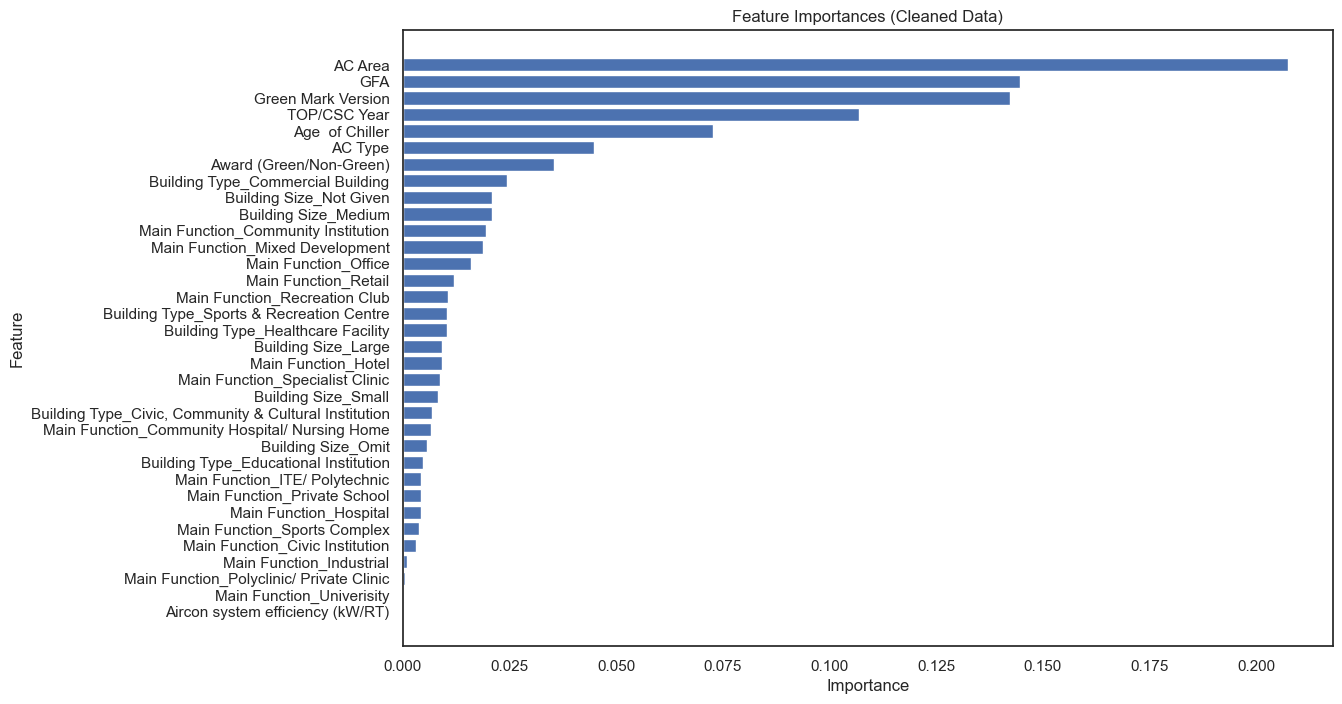

In [784]:
# Preprocess your DataFrame
# For this example, let's assume the target variable is 'target' and it's a classification task
from sklearn.ensemble import RandomForestClassifier
target = 'EUI2022 '
features = df_encoded.drop(columns=[target])
labels = df_encoded[target]
# Calculate the first and third quartiles

Q1 = np.percentile(labels, 25)
Q3 = np.percentile(labels, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Identify outliers
outliers_indices = labels[(labels < Q1 - outlier_step) | (labels > Q3 + outlier_step)].index

# Remove outliers
df_cleaned = df_encoded.drop(outliers_indices)

# Reassign features and labels
features_cleaned = df_cleaned.drop(columns=[target])
labels_cleaned = df_cleaned[target]

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(features_cleaned, labels_cleaned, test_size=0.2, random_state=42)

# Train a Random Forest model on the cleaned data
rf_cleaned = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the cleaned test data
y_pred_cleaned = rf_cleaned.predict(X_test_cleaned)

# Evaluate the model's performance on the cleaned data
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print(f'Cleaned Mean Squared Error (MSE): {mse_cleaned:.2f}')
print(f'Cleaned Mean Absolute Error (MAE): {mae_cleaned:.2f}')
print(f'Cleaned R^2 Score: {r2_cleaned:.2f}')


from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_cleaned, y_train_cleaned)
y_pred_gbr = gbr.predict(X_test_cleaned)

mse_gbr = mean_squared_error(y_test_cleaned, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test_cleaned, y_pred_gbr)
r2_gbr = r2_score(y_test_cleaned, y_pred_gbr)

print(f'Gradient Boosting MSE: {mse_gbr:.2f}')
print(f'Gradient Boosting MAE: {mae_gbr:.2f}')
print(f'Gradient Boosting R^2: {r2_gbr:.2f}')


from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train_cleaned, y_train_cleaned)
y_pred_xgbr = xgbr.predict(X_test_cleaned)

mse_xgbr = mean_squared_error(y_test_cleaned, y_pred_xgbr)
mae_xgbr = mean_absolute_error(y_test_cleaned, y_pred_xgbr)
r2_xgbr = r2_score(y_test_cleaned, y_pred_xgbr)

print(f'XGBoost MSE: {mse_xgbr:.2f}')
print(f'XGBoost MAE: {mae_xgbr:.2f}')
print(f'XGBoost R^2: {r2_xgbr:.2f}')


# from lightgbm import LGBMRegressor

# lgbm = LGBMRegressor(n_estimators=100, random_state=42)
# lgbm.fit(X_train_cleaned, y_train_cleaned)
# y_pred_lgbm = lgbm.predict(X_test_cleaned)

# mse_lgbm = mean_squared_error(y_test_cleaned, y_pred_lgbm)
# mae_lgbm = mean_absolute_error(y_test_cleaned, y_pred_lgbm)
# r2_lgbm = r2_score(y_test_cleaned, y_pred_lgbm)

# print(f'LightGBM MSE: {mse_lgbm:.2f}')
# print(f'LightGBM MAE: {mae_lgbm:.2f}')
# print(f'LightGBM R^2: {r2_lgbm:.2f}')



from catboost import CatBoostRegressor

catboost = CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
catboost.fit(X_train_cleaned, y_train_cleaned)
y_pred_catboost = catboost.predict(X_test_cleaned)

mse_catboost = mean_squared_error(y_test_cleaned, y_pred_catboost)
mae_catboost = mean_absolute_error(y_test_cleaned, y_pred_catboost)
r2_catboost = r2_score(y_test_cleaned, y_pred_catboost)

print(f'CatBoost MSE: {mse_catboost:.2f}')
print(f'CatBoost MAE: {mae_catboost:.2f}')
print(f'CatBoost R^2: {r2_catboost:.2f}')


from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_cleaned, y_train_cleaned)
y_pred_svr = svr.predict(X_test_cleaned)

mse_svr = mean_squared_error(y_test_cleaned, y_pred_svr)
mae_svr = mean_absolute_error(y_test_cleaned, y_pred_svr)
r2_svr = r2_score(y_test_cleaned, y_pred_svr)

print(f'SVR MSE: {mse_svr:.2f}')
print(f'SVR MAE: {mae_svr:.2f}')
print(f'SVR R^2: {r2_svr:.2f}')


from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp.fit(X_train_cleaned, y_train_cleaned)
y_pred_mlp = mlp.predict(X_test_cleaned)

mse_mlp = mean_squared_error(y_test_cleaned, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test_cleaned, y_pred_mlp)
r2_mlp = r2_score(y_test_cleaned, y_pred_mlp)

print(f'MLP Regressor MSE: {mse_mlp:.2f}')
print(f'MLP Regressor MAE: {mae_mlp:.2f}')
print(f'MLP Regressor R^2: {r2_mlp:.2f}')













# Get feature importances for the cleaned model
importances_cleaned = rf_cleaned.feature_importances_
feature_names_cleaned = features_cleaned.columns
feature_importances_cleaned = pd.DataFrame({'feature': feature_names_cleaned, 'importance': importances_cleaned})

# Sort the features by importance
feature_importances_cleaned = feature_importances_cleaned.sort_values(by='importance', ascending=False)

# Plot the feature importances for the cleaned model
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_cleaned['feature'], feature_importances_cleaned['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Cleaned Data)')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

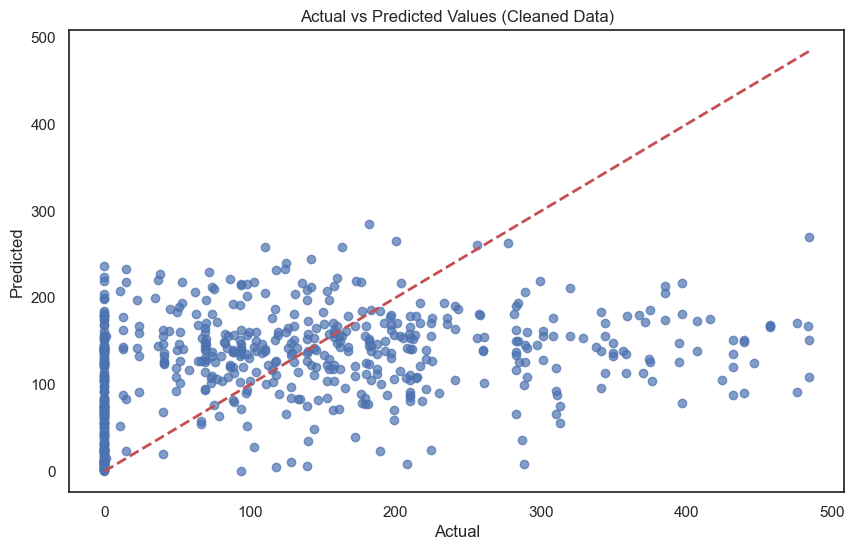

In [609]:
# Plot actual vs predicted values for the cleaned model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.7)
plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Cleaned Data)')
plt.show()

SYNTHETIC DATA

In [736]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r'D:\VS code files\building_energy_consumption\dataset\singapore_dataset\end_end\data\building-energy-performance-data-for-2022.csv')
df.head()

,Building Type,Main Function,Building Size,EUI2020,EUI Quartile/ Energy Ranking2020,EUI2021,EUI Quartile/ Energy Ranking 2021,EUI2022,EUI Quartile/ Energy Ranking 2022,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Area Percentage,No. Of Hotel Room,AC Type,Age of Chiller,Aircon system efficiency (kW/RT)
0,Commercial Building,Industrial,Large,3725.0,NaN,4453,NaN,4580,NaN,2015,Platinum,Existing Data Centres,"35,218","28,536",81%,0,Water Cooled Chilled Water Plant,7.0,0.744
1,Commercial Building,Industrial,Large,2044.0,Bottom Quartile,2214,Bottom Quartile,2305,Bottom Quartile,1999,NaN,NaN,"38,349","20,000",52%,0,Water Cooled Chilled Water Plant,20.0,0.000
2,Commercial Building,Industrial,Large,1157.0,Bottom Quartile,1182,Bottom Quartile,1151,Bottom Quartile,2014,Platinum,New Building for Non-Residential buildings (ve...,"19,173","19,173",100%,0,Water Cooled Chilled Water Plant,5.0,0.578
3,Commercial Building,Office,Large,553.0,Bottom Quartile,661,Bottom Quartile,805,Bottom Quartile,1986,NaN,NaN,"15,819","12,724",80%,0,Water Cooled Chilled Water Plant,0.0,0.000
4,Commercial Building,Industrial,Large,713.0,Bottom Quartile,712,Bottom Quartile,724,Bottom Quartile,1995,GoldPlus,Existing Building for Non-Residential building...,"30,469","22,476",74%,0,Water Cooled Chilled Water Plant,8.0,0.582


In [737]:
df.columns

Index(['Building Type', 'Main Function', 'Building Size', 'EUI2020',
       'EUI Quartile/ Energy Ranking2020', 'EUI2021 ',
       'EUI Quartile/ Energy Ranking 2021', 'EUI2022 ',
       'EUI Quartile/ Energy Ranking 2022', 'TOP/CSC Year',
       'Award (Green/Non-Green)', 'Green Mark Version', 'GFA', 'AC Area',
       'AC Area Percentage', 'No. Of Hotel Room', 'AC Type', 'Age  of Chiller',
       'Aircon system efficiency (kW/RT)'],
      dtype='object')

In [738]:
df = df[['Building Type','Main Function','Building Size','EUI2022 ','TOP/CSC Year','Award (Green/Non-Green)','Green Mark Version','GFA','AC Area','AC Type','Age  of Chiller']]
#df.dropna(inplace=True)
def remove_outliers_iqr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])

    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter the DataFrame
    mask = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Return the filtered DataFrame
    return df[mask]


df = remove_outliers_iqr(df)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 12 to 1496
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Building Type                     1044 non-null   object 
 1   Main Function                     1044 non-null   object 
 2   Building Size                     802 non-null    object 
 3   EUI2022                           1044 non-null   int64  
 4   TOP/CSC Year                      1044 non-null   int64  
 5   Award (Green/Non-Green)           489 non-null    object 
 6   Green Mark Version                470 non-null    object 
 7   GFA                               1044 non-null   object 
 8   AC Area                           1044 non-null   object 
 9   AC Type                           499 non-null    object 
 10  Age  of Chiller                   1044 non-null   float64
 11  Aircon system efficiency (kW/RT)  1044 non-null   float64
dtypes: float64

In [739]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

df['GFA'] = df['GFA'].astype(float)

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 12 to 1496
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Building Type                     1044 non-null   object 
 1   Main Function                     1044 non-null   object 
 2   Building Size                     802 non-null    object 
 3   EUI2022                           1044 non-null   int64  
 4   TOP/CSC Year                      1044 non-null   int64  
 5   Award (Green/Non-Green)           489 non-null    object 
 6   Green Mark Version                470 non-null    object 
 7   GFA                               1044 non-null   float64
 8   AC Area                           1044 non-null   float64
 9   AC Type                           499 non-null    object 
 10  Age  of Chiller                   1044 non-null   float64
 11  Aircon system efficiency (kW/RT)  1044 non-null   float64
dtypes: float64

In [741]:
df.columns

Index(['Building Type', 'Main Function', 'Building Size', 'EUI2022 ',
       'TOP/CSC Year', 'Award (Green/Non-Green)', 'Green Mark Version', 'GFA',
       'AC Area', 'AC Type', 'Age  of Chiller',
       'Aircon system efficiency (kW/RT)'],
      dtype='object')

In [742]:
categorical_columns = ['Building Type','Main Function','EUI2022 ','Building Size','TOP/CSC Year','Award (Green/Non-Green)','Green Mark Version','GFA','AC Area','AC Type','Age  of Chiller']
#categorical_columns = df.columns
print(categorical_columns)

['Building Type', 'Main Function', 'EUI2022 ', 'Building Size', 'TOP/CSC Year', 'Award (Green/Non-Green)', 'Green Mark Version', 'GFA', 'AC Area', 'AC Type', 'Age  of Chiller', 'Aircon system efficiency (kW/RT)']


In [743]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(df,categorical_columns,epochs=600)

Gen. (-0.27) | Discrim. (-0.04): 100%|██████████| 600/600 [14:08<00:00,  1.41s/it]


In [744]:
sample = ctgan.sample(1000)

In [745]:
df.shape,sample.shape

((1044, 12), (1000, 12))

In [746]:
df.head()

,Building Type,Main Function,Building Size,EUI2022,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type,Age of Chiller,Aircon system efficiency (kW/RT)
12,Commercial Building,Office,Large,457,2014,Platinum,New Building for Non-Residential buildings (ve...,40880.0,35333.0,District Cooling System (DCS),0.0,0.0
15,Commercial Building,Office,Large,424,2006,Gold,GM:2021 In Operation,12960.0,10000.0,District Cooling System (DCS),0.0,0.0
17,Commercial Building,Office,Large,397,1986,GoldPlus,Existing Building for Non-Residential building...,44934.0,41000.0,Water Cooled Chilled Water Plant,0.0,0.0
19,Commercial Building,Office,Large,356,1995,NaN,NaN,30809.0,29361.0,Water Cooled Chilled Water Plant,17.0,0.0
22,Commercial Building,Office,Large,311,2012,GoldPlus,Existing Non-Residental Buildings ENRB: 2017,31539.0,28385.0,District Cooling System (DCS),0.0,0.0


In [747]:
df.isnull().sum()

Building Type                         0
Main Function                         0
Building Size                       242
EUI2022                               0
TOP/CSC Year                          0
Award (Green/Non-Green)             555
Green Mark Version                  574
GFA                                   0
AC Area                               0
AC Type                             545
Age  of Chiller                       0
Aircon system efficiency (kW/RT)      0
dtype: int64

In [748]:
df['Building Size'].fillna('Not Given',inplace=True)
df['Award (Green/Non-Green)'].fillna('Not Given',inplace=True)
df['Green Mark Version'].fillna('Not Given',inplace=True)
df['AC Type'].fillna('Not Given',inplace=True)

In [749]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

df['GFA'] = df['GFA'].astype(float)

In [750]:
sample.head()

,Building Type,Main Function,Building Size,EUI2022,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type,Age of Chiller,Aircon system efficiency (kW/RT)
0,"Civic, Community & Cultural Institution",Office,Small,484,2002,NaN,NaN,16122.0,5600.0,Others,0.0,0.0
1,Commercial Building,Office,Large,0,1993,Certified,New Building for Non-Residential buildings (ve...,13627.0,0.0,NaN,5.0,0.0
2,Commercial Building,Retail,Medium,267,2016,NaN,NaN,23225.0,7110.0,Others,0.0,0.0
3,Healthcare Facility,Office,NaN,235,1993,GoldPlus,Existing Non-Residential Buildings (RECERT 2017),47107.0,389.0,Others,0.0,0.0
4,Commercial Building,Retail,Large,0,1985,Platinum,New Building for Non-Residential buildings (ve...,7450.0,0.0,NaN,1.0,0.0


In [751]:
sample.isnull().sum()

Building Type                         0
Main Function                         0
Building Size                       400
EUI2022                               0
TOP/CSC Year                          0
Award (Green/Non-Green)             499
Green Mark Version                  468
GFA                                   0
AC Area                               0
AC Type                             306
Age  of Chiller                       0
Aircon system efficiency (kW/RT)      0
dtype: int64

In [752]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Building Type                     1000 non-null   object 
 1   Main Function                     1000 non-null   object 
 2   Building Size                     600 non-null    object 
 3   EUI2022                           1000 non-null   int64  
 4   TOP/CSC Year                      1000 non-null   int64  
 5   Award (Green/Non-Green)           501 non-null    object 
 6   Green Mark Version                532 non-null    object 
 7   GFA                               1000 non-null   float64
 8   AC Area                           1000 non-null   float64
 9   AC Type                           694 non-null    object 
 10  Age  of Chiller                   1000 non-null   float64
 11  Aircon system efficiency (kW/RT)  1000 non-null   float64
dtypes: floa

In [753]:
sample['Building Size'].fillna('Not Given',inplace=True)
sample['Award (Green/Non-Green)'].fillna('Not Given',inplace=True)
sample['Green Mark Version'].fillna('Not Given',inplace=True)
sample['AC Type'].fillna('Not Given',inplace=True)

Dataframe shape: (1044, 12)
Sample shape: (1000, 12)
Columns match.
All specified categorical columns are present in the dataframe.


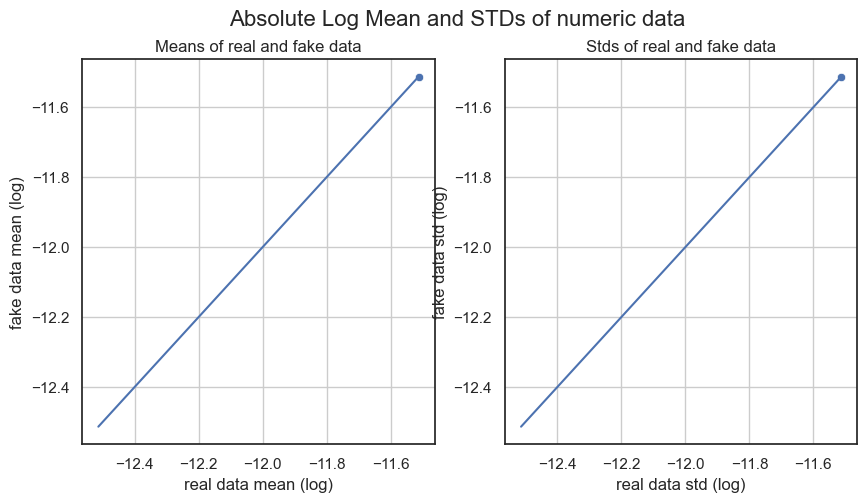

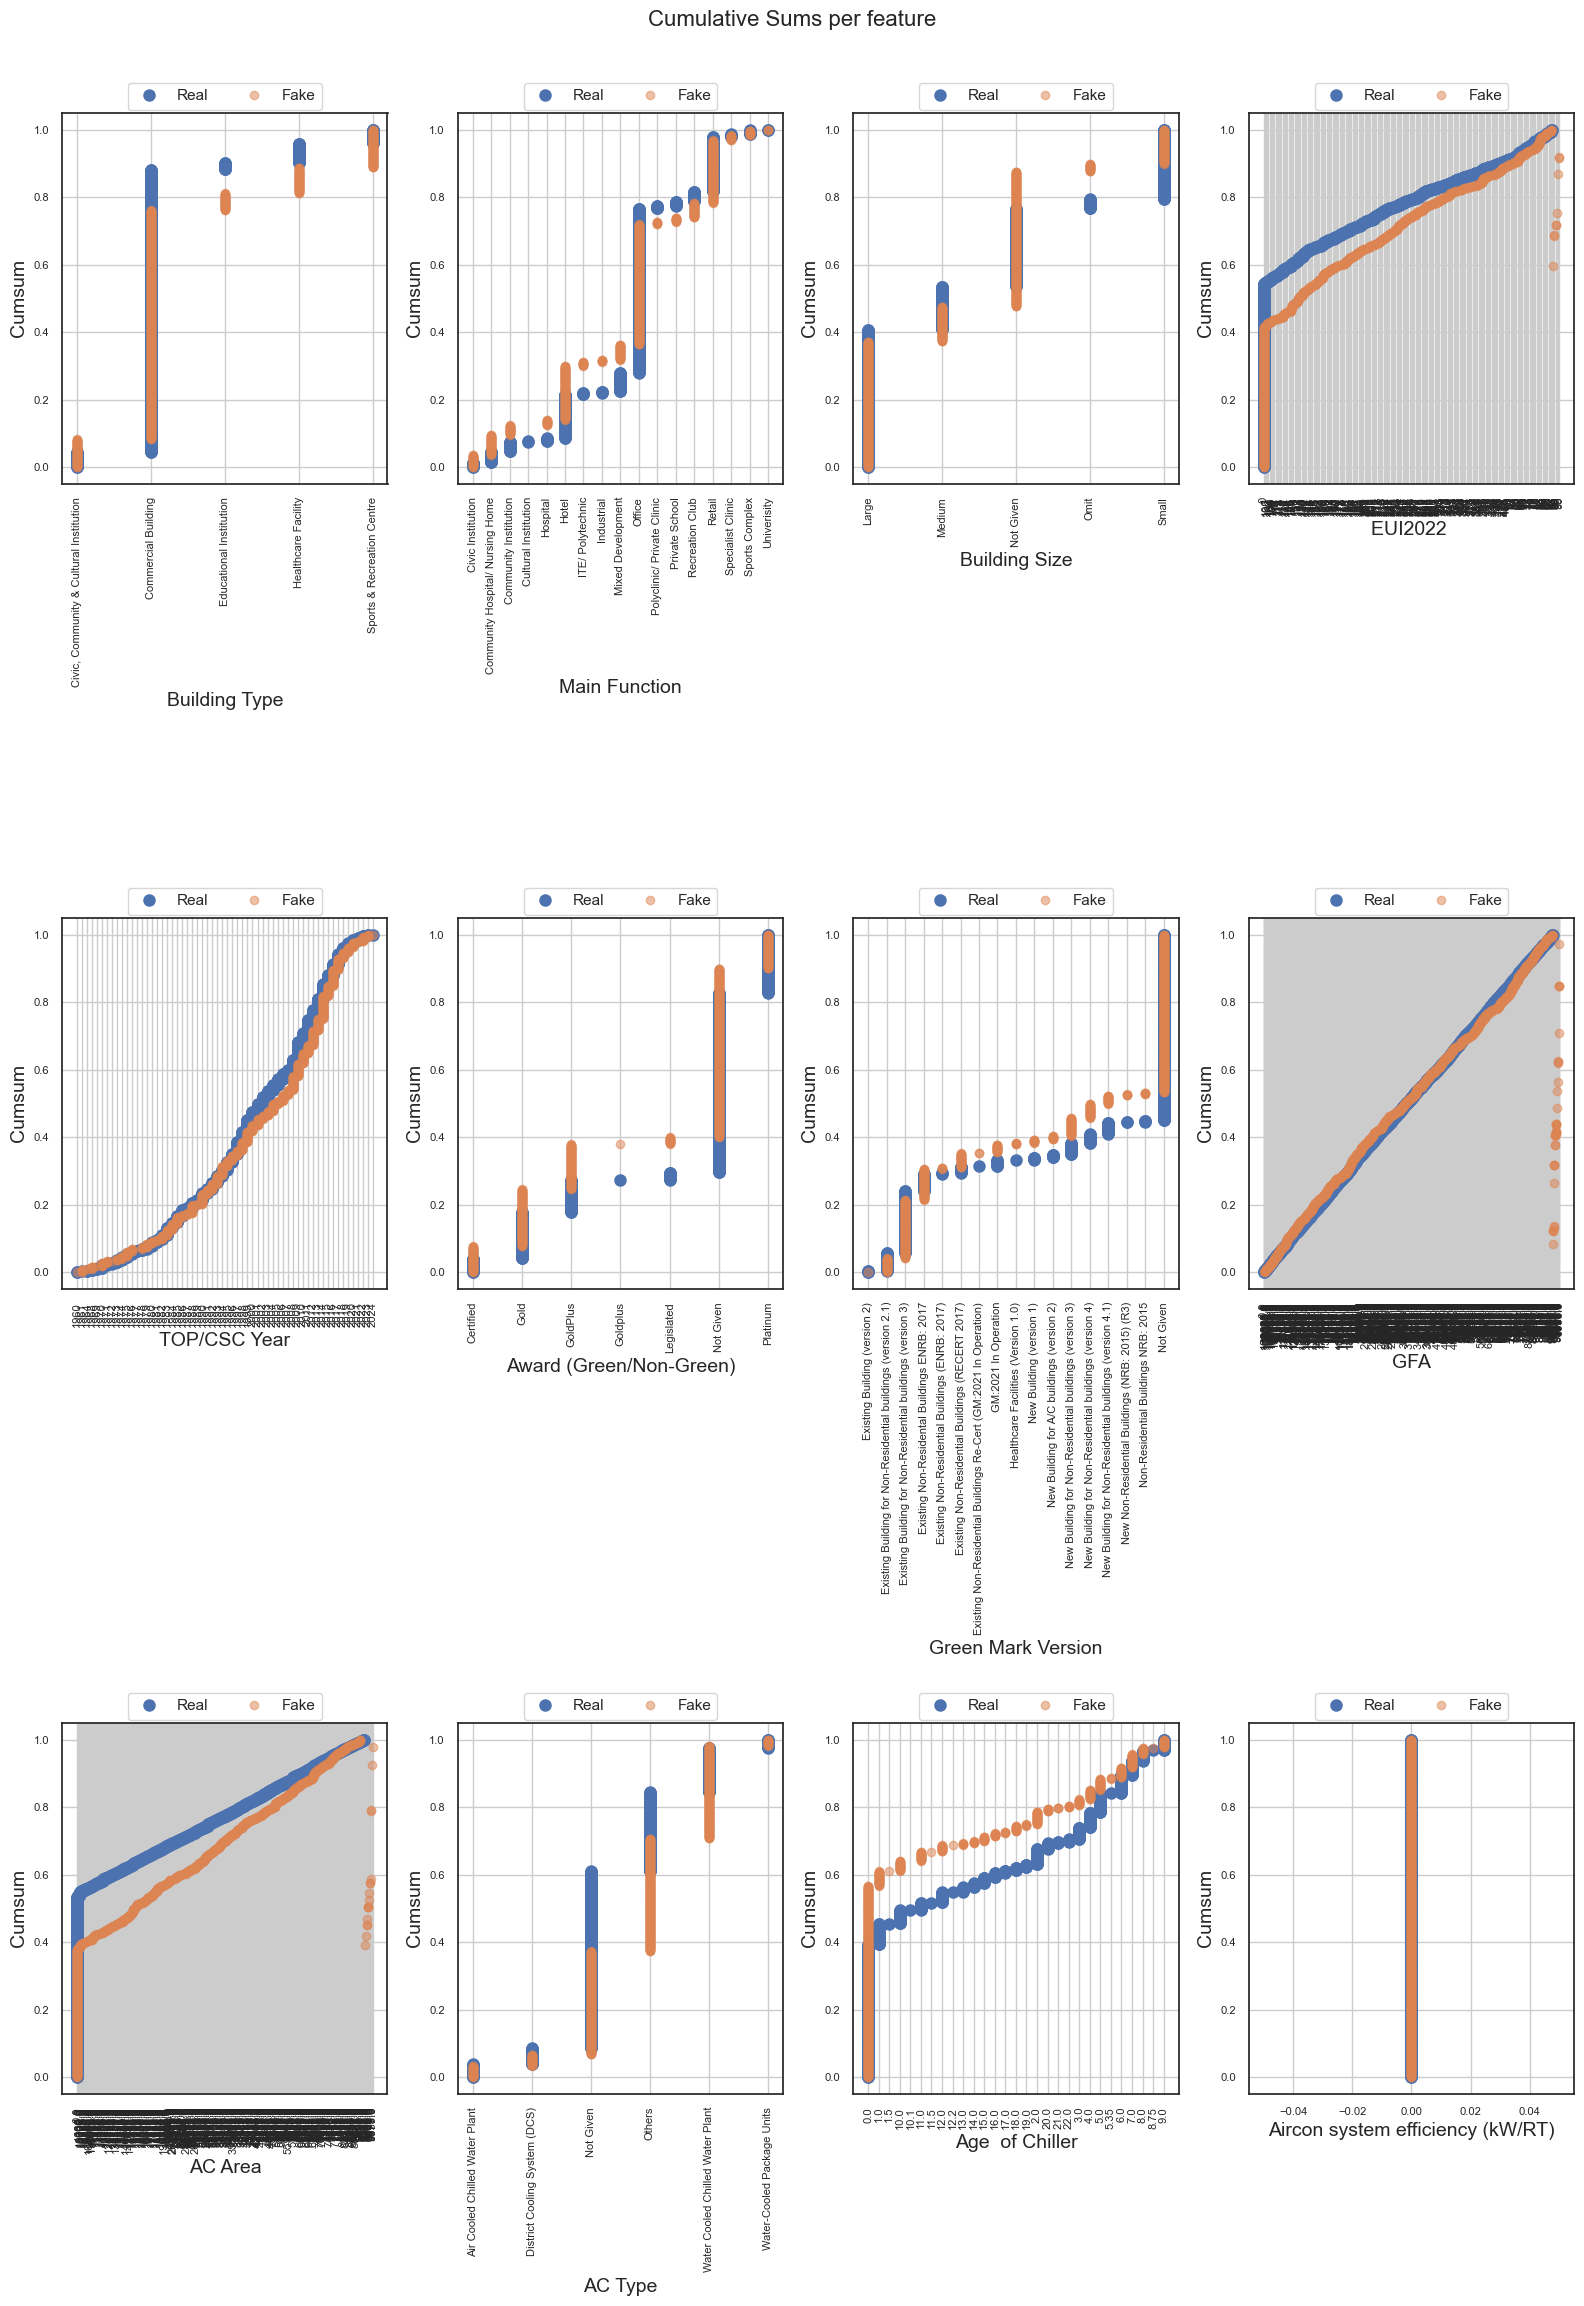

Error during visual evaluation: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.


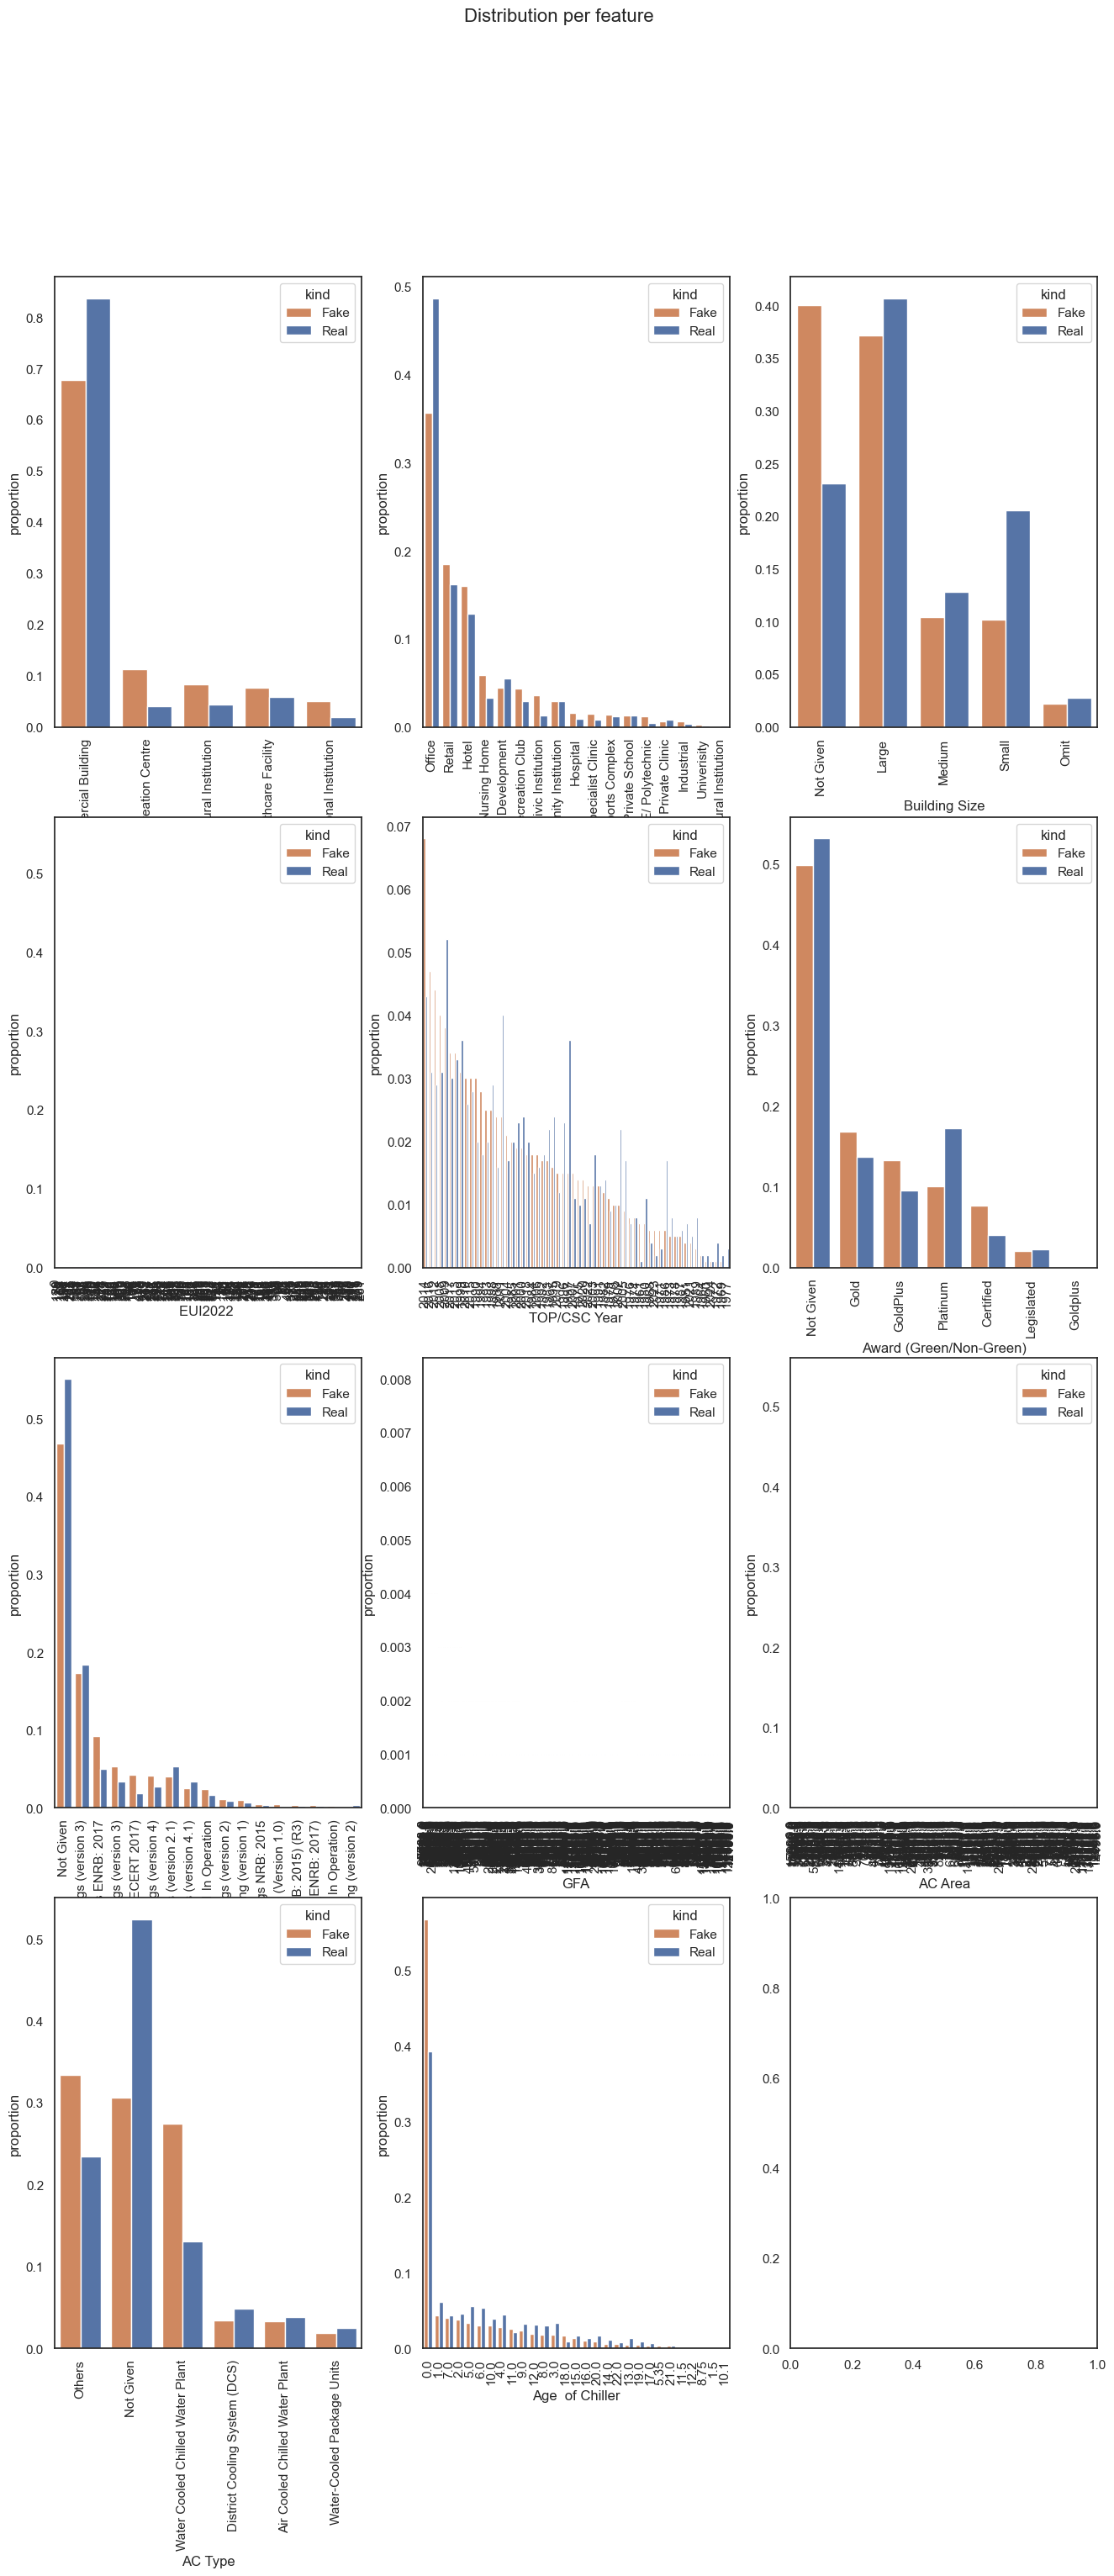

In [754]:
# from table_evaluator import TableEvaluator

# print(df.shape,sample.shape)
# table_evaluator = TableEvaluator(df,sample,cat_cols=categorical_columns)

# table_evaluator.visual_evaluation()

import pandas as pd
from table_evaluator import TableEvaluator

categorical_columns = ['Building Type','Main Function','EUI2022 ','Building Size','TOP/CSC Year','Award (Green/Non-Green)','Green Mark Version','GFA','AC Area','AC Type','Age  of Chiller']
#categorical_columns = df.columns

print("Dataframe shape:", df.shape)
print("Sample shape:", sample.shape)

# Step 1: Check for empty dataframes
if df.empty or sample.empty:
    print("One of the dataframes is empty!")

# Step 2: Check column alignment
if not (df.columns == sample.columns).all():
    print("Columns do not match!")
    print("df columns:", df.columns)
    print("sample columns:", sample.columns)
else:
    print("Columns match.")

# Step 3: Check categorical columns
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    print("The following categorical columns are missing in the dataframe:", missing_columns)
else:
    print("All specified categorical columns are present in the dataframe.")

# Create the TableEvaluator instance
table_evaluator = TableEvaluator(df, sample, cat_cols=categorical_columns)

# Perform visual evaluation
try:
    table_evaluator.visual_evaluation()
except ValueError as e:
    print("Error during visual evaluation:", e)


In [756]:
#sample.to_csv('synthetic_data.csv',index=False)